# Fully Connected Neural Network with Cat-vs-NoCat and mnist data

This is a Fully Connected 5 layer Neural Network. I have used it to train on MNIST Hand written digits data to recognize the number, and on data with different images to recognize if the image has cat in it.

## Importing necessary libraries

First I imported the liabraries used to define system path and to configure intitialization.
- config liabrary sets up seed, number of classes, epochs, learning rate, filename
- data_loader is a liabrary with following functions 
  - load_cvnc_data (to load cat vs. no cat data), returns train_set_x, train_set_y, test_set_x, test_set_y, classes (1/0)
  - load_mnist_data (to load mnist data), returns train_set_x, train_set_y, test_set_x, test_set_y, classes (one, two, three...)
  - normalize_image data (which normalizes the input images by dividing by 255)
  - one_hot_data (to flatten the output vector y)



In [1]:
import sys
sys.path.insert(0, f'src')
import config
from data_loader import load_cvnc_data, load_minst_data, normalize_image_data, one_hot_data
import py7zr

## input images

Now we need to define a function to show the input image. show_image() takes the x, y set of examples, the class id list and an index as an input and then validates if the index is out of bounds of the input set. imshow() takes the image number as an argument and shows the image. Image number, output y, class ('cat/non-cat'  in case of cvnc data and 'one/two/three..' in case of mnist data). the function may be called for both training and testing data split.

In [2]:
import matplotlib.pyplot as plt
def show_image(set_x, set_y, classes, index = 10):
    if index >= len(set_x): index = 0
    plt.imshow(set_x[index])
    print ("Image# " + str(index+1) +": y = " + str(set_y[0,index]) + ". It's a '" + classes[set_y[0,index]].decode("utf-8") +  "' picture.")


In [3]:
train_x, train_y, test_x, test_y, classes = load_cvnc_data()

Image# 11: y = 0. It's a 'non-cat' picture.


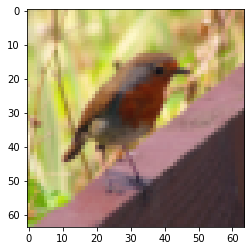

In [4]:
show_image(train_x, train_y, classes)

## Normalizing the input data

We update the train and test input features by normalizing the images. normalize_image_data() does that. Similarly the output vector is flatten by calling the function one_hot_data(). Both these functions have already been imported from data_loader library.

In [5]:
train_x = normalize_image_data(train_x)
test_x  = normalize_image_data(test_x)
train_y = one_hot_data(train_y, classes)
test_y  = one_hot_data(test_y, classes)

## Defining Fully Connected Layers

Next we import the class FullyConnectedLayer from file fc_layer. It takes number of inputs and outputs and the type of activation for one layer. The input, output and activation is sent as an argument to another class called FullyConnectedUnit. We then perform forward and backward propagation with the functions forward() and backward(). update() function updates Weights W and B with respect to learning rate (initially set as 0.01).

Now we define five hidden layers, four of which has Relu Activation and the last one has Softmax. Then number of inputs and outputs for the hidden layers are set manually.

In [6]:
from fc_layer import FullyConnectedLayer
fc0 = FullyConnectedLayer(train_x.shape[0],256,'Relu')
fc1 = FullyConnectedLayer(256,128,'Relu')
fc2 = FullyConnectedLayer(128,64,'Relu')
fc3 = FullyConnectedLayer(64,16,'Relu')
fcf = FullyConnectedLayer(16,len(classes),'Softmax')

## Setting up the Neural Network

Now we are all ready to set the Network. class NN_Network is imported from file nn_network. 

In [7]:
from nn_network import NN_Network
model = NN_Network(l_rate=0.02)

In [8]:
model.add_layer(fc0)
model.add_layer(fc1)
model.add_layer(fc2)
model.add_layer(fc3)
model.add_layer(fcf)

In [11]:
costs = model.train(train_x, train_y, 5000, dynamic_learning=True)

Training started
Learning rate = 0.02
Cost at epoch 100 is 0.26714, Iteration time : 49.672
Cost at epoch 200 is 0.17686, Iteration time : 49.875
Cost at epoch 300 is 0.07012, Iteration time : 50.609
Cost at epoch 400 is 0.00955, Iteration time : 50.812
Cost at epoch 500 is 0.00382, Iteration time : 51.531
Learning rate reduced to 0.01
Cost at epoch 600 is 0.00284, Iteration time : 51.953
Cost at epoch 700 is 0.00224, Iteration time : 52.000
Cost at epoch 800 is 0.00183, Iteration time : 52.688
Cost at epoch 900 is 0.00153, Iteration time : 52.000
Cost at epoch 1000 is 0.00131, Iteration time : 52.328
Learning rate reduced to 0.005
Cost at epoch 1100 is 0.00121, Iteration time : 52.453
Cost at epoch 1200 is 0.00113, Iteration time : 52.406
Cost at epoch 1300 is 0.00106, Iteration time : 52.406
Cost at epoch 1400 is 0.00100, Iteration time : 52.344
Cost at epoch 1500 is 0.00094, Iteration time : 51.906
Learning rate reduced to 0.0025
Cost at epoch 1600 is 0.00091, Iteration time : 51.76

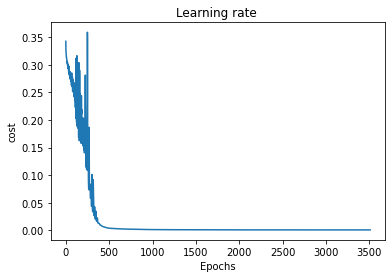

In [12]:
import numpy as np
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Learning rate ")
plt.show()

In [15]:
import pickle
import os

with open('model/cvnc_fc5.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with py7zr.SevenZipFile('model/cvnc_fc5.pickle.7z', "w") as zip:
    zip.write('model/cvnc_fc5.pickle')
    os.remove('model/cvnc_fc5.pickle')

In [16]:
with py7zr.SevenZipFile('model/cvnc_fc5.pickle.7z', "r") as zip:
    zip.extractall()
os.remove('model/cvnc_fc5.pickle.7z')

In [17]:
with open('model/cvnc_fc5.pickle', 'rb') as handle:
    model = pickle.load(handle)

In [19]:
probs, act = model.evaluate(test_x, test_y)
print(probs)
print(act)

Accuracy: 0.760
[[1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0
  0 1 0 0 0 0 1 0 1 0 0 1 1 0]]
[[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]


In [20]:
train_x, train_y, test_x, test_y, classes = load_minst_data()

Image# 46: y = 9. It's a 'Nine' picture.


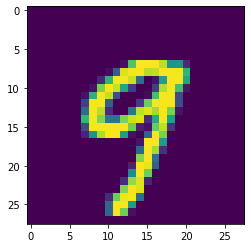

In [21]:
show_image(train_x, train_y, classes, index=45)

In [22]:
train_x = normalize_image_data(train_x)
test_x  = normalize_image_data(test_x)
train_y = one_hot_data(train_y, classes)
test_y  = one_hot_data(test_y, classes)

In [23]:
from fc_layer import FullyConnectedLayer
fc0 = FullyConnectedLayer(int(train_x.shape[0]   ),int(train_x.shape[0]/2 ),'Relu')
fc1 = FullyConnectedLayer(int(train_x.shape[0]/2 ),int(train_x.shape[0]/4 ),'Relu')
fc2 = FullyConnectedLayer(int(train_x.shape[0]/4 ),int(train_x.shape[0]/8 ),'Relu')
fc3 = FullyConnectedLayer(int(train_x.shape[0]/8 ),int(train_x.shape[0]/16),'Relu')
fcf = FullyConnectedLayer(int(train_x.shape[0]/16),len(classes),'Softmax')

In [24]:
from nn_network import NN_Network
model = NN_Network(l_rate=0.01)

In [25]:
model.add_layer(fc0)
model.add_layer(fc1)
model.add_layer(fc2)
model.add_layer(fc3)
model.add_layer(fcf)

In [26]:
costs = model.train(train_x, train_y, 5000, dynamic_learning=True)

Training started
Learning rate = 0.01
Cost at epoch 100 is 0.22072, Iteration time : 1936.500
Cost at epoch 200 is 0.19761, Iteration time : 2047.031
Cost at epoch 300 is 0.14876, Iteration time : 1979.922
Cost at epoch 400 is 0.10042, Iteration time : 1938.484
Cost at epoch 500 is 0.07349, Iteration time : 1916.562
Learning rate reduced to 0.005
Cost at epoch 600 is 0.06523, Iteration time : 1877.266
Cost at epoch 700 is 0.05919, Iteration time : 1872.078
Cost at epoch 800 is 0.05460, Iteration time : 1863.031
Cost at epoch 900 is 0.05102, Iteration time : 1856.594
Cost at epoch 1000 is 0.04816, Iteration time : 1867.828
Learning rate reduced to 0.0025
Cost at epoch 1100 is 0.04692, Iteration time : 1868.781
Cost at epoch 1200 is 0.04580, Iteration time : 1855.078
Cost at epoch 1300 is 0.04477, Iteration time : 1876.844
Cost at epoch 1400 is 0.04383, Iteration time : 1878.875
Cost at epoch 1500 is 0.04296, Iteration time : 1880.359
Learning rate reduced to 0.00125
Cost at epoch 1600 i

In [ ]:
import numpy as np
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Learning rate ")
plt.show()

In [ ]:
probs, act = model.evaluate(test_x, test_y)
print(probs)
print(act)

In [ ]:
import pickle

with open('model/minst_fc5.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with py7zr.SevenZipFile('model/minst_fc5.pickle.7z', "w",) as zip:
    zip.write('model/minst_fc5.pickle')    
    os.remove('model/minst_fc5.pickle')

In [ ]:
with py7zr.SevenZipFile('model/minst_fc5.pickle.7z', "r") as zip:
    zip.extractall()
os.remove('model/minst_fc5.pickle.7z')

In [ ]:
with open('model/minst_fc5.pickle', 'rb') as handle:
    model = pickle.load(handle)